importing all the needed libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

importing the wine data

In [2]:
wine_data = pd.read_csv('QualityPrediction.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### Checking the shape of the data

In [3]:
wine_data.shape

(1599, 12)

#### Info about the data

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No null value present

In [7]:
wine_data.iloc[:,:-1].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


Mean and Median looks quite similar...so need look into the distribution of variables

#### Distribution of the target variable

In [4]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The data is quite un-balanced with respect to its target classes.

##### Histogram of the target class

<AxesSubplot:xlabel='quality', ylabel='Count'>

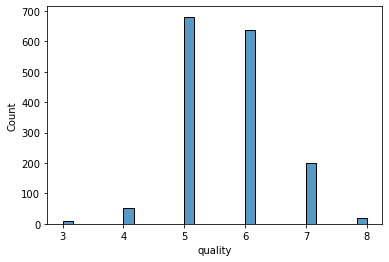

In [5]:
sns.histplot(wine_data['quality'])

##### Plotting to if there is any relation among the variables

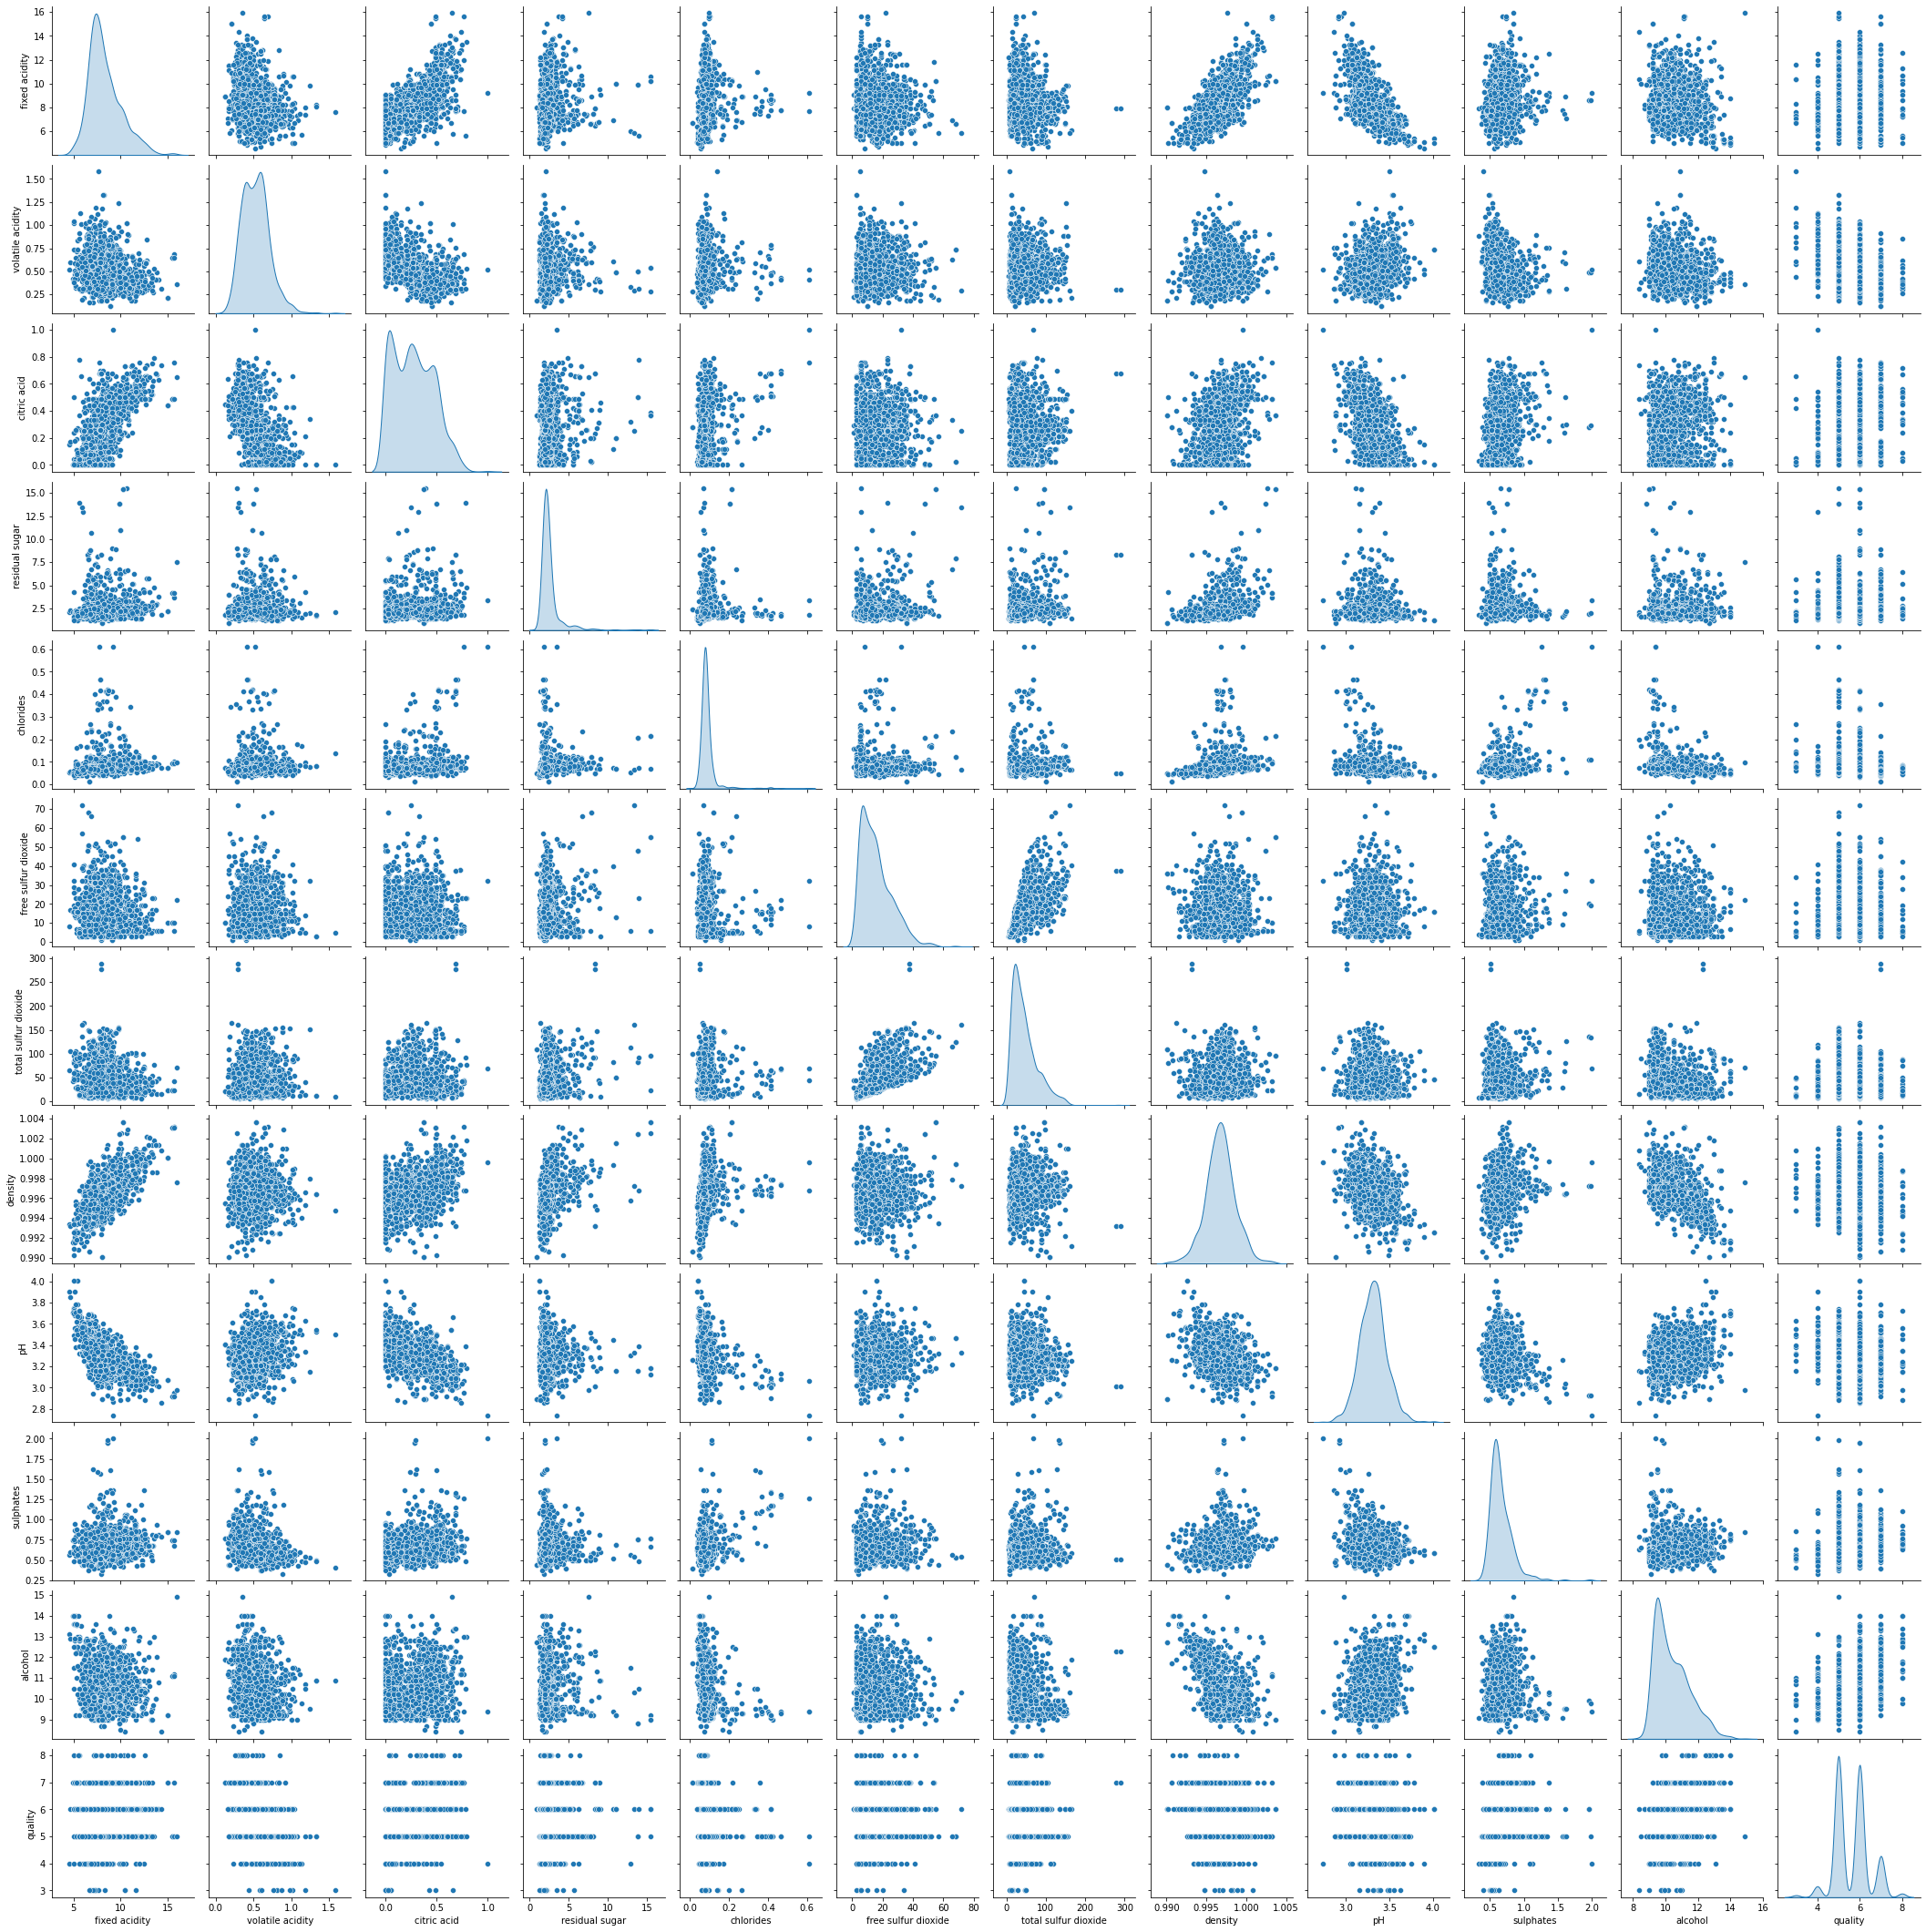

In [8]:
sns.pairplot(wine_data,diag_kind='kde')

#### Checking the correlation between the variables

In [9]:
wine_data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


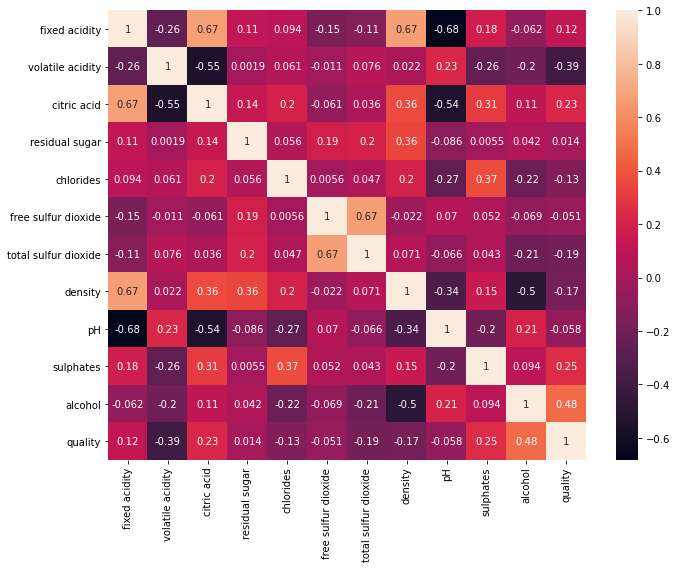

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(wine_data.corr(),annot=True)
plt.tight_layout()

1. Some positive correlation between fixed acidity and citric acid</br>
2. Negative correlation between fixed acidity and pH</br>
3. Some positive correlation between free sulfur dioxide and total sulfur dioxide</br>
4. alcohol,sulpahtes and citric acid seems to have more correlation with target variable i.e quality 

In [11]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Plotting only the kde plot for the variables to clearly see the distribution and outliers

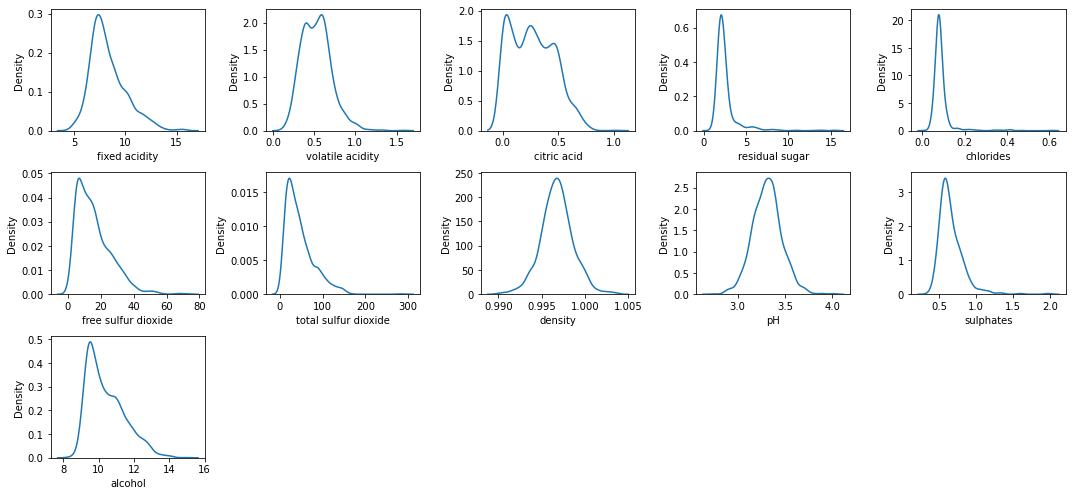

In [12]:
row = 3
col = 5
idx = 1
plt.figure(figsize=(15,7))
for column in wine_data.iloc[:,:-1].columns:
    
    plt.subplot(row,col,idx)
    sns.kdeplot(wine_data[column])
    
    
    idx += 1
plt.tight_layout()
plt.show()

#### Function for standardizing the data

In [14]:
def standardize_data(data):
    data_copy = data.copy()
    m = np.mean(data)
    std_dev = np.std(data)
    data_copy = (data_copy-m)/std_dev
    return data_copy

#### Checking for outliers with the help of box plot

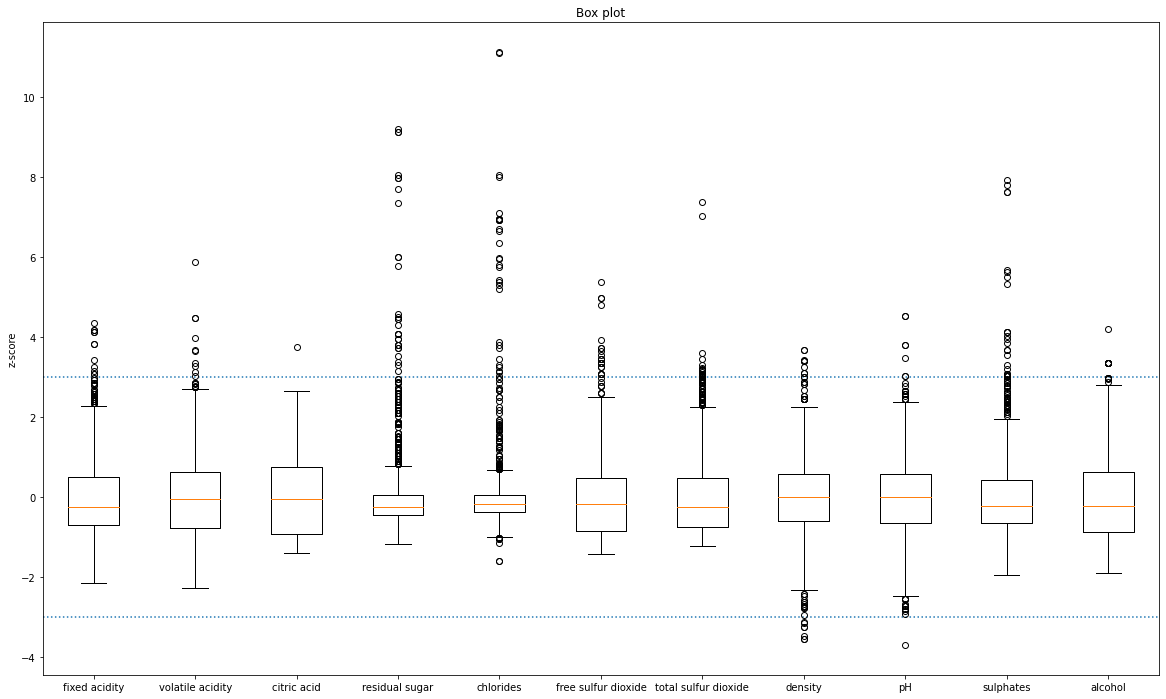

In [15]:
plt.figure(figsize=(20,12))
plt.boxplot(standardize_data(wine_data.iloc[:,:-1]))
plt.ylabel('z-score')
plt.title('Box plot')
plt.hlines(y=-3,xmin=0.5,xmax=11.5,linestyles='dotted')
plt.hlines(y=3,xmin=0.5,xmax=11.5,linestyles='dotted')
plt.xticks(ticks=np.arange(1,12),labels=wine_data.iloc[:,:-1].columns)
plt.show()

We can clearly see from the box plot that outliers are present

#### Skewness for the variables

In [13]:
wine_data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

chlorides, residual sugar and sulphates are the most skewed.

##### Plotting kde plot for chlorides, residual sugar and sulphates to see their skewness

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

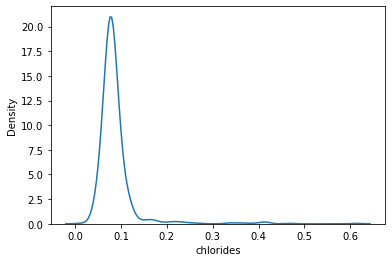

In [16]:
sns.kdeplot(data=wine_data,x='chlorides')

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

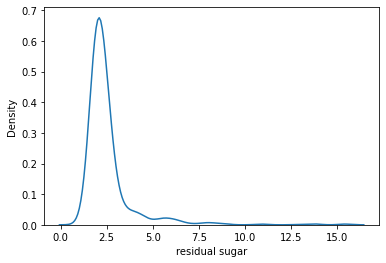

In [18]:
sns.kdeplot(data=wine_data,x='residual sugar')

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

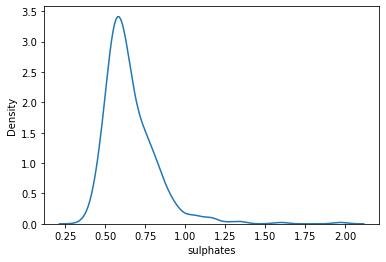

In [19]:
sns.kdeplot(data=wine_data,x='sulphates')

#### Removing the outliers

In [20]:
Q1 = wine_data.quantile(0.25)
Q1

fixed acidity            7.1000
volatile acidity         0.3900
citric acid              0.0900
residual sugar           1.9000
chlorides                0.0700
free sulfur dioxide      7.0000
total sulfur dioxide    22.0000
density                  0.9956
pH                       3.2100
sulphates                0.5500
alcohol                  9.5000
quality                  5.0000
Name: 0.25, dtype: float64

In [21]:
Q3 = wine_data.quantile(0.75)
Q3

fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64

##### Inter-quartile range

In [22]:
IQR = Q3 - Q1

In [23]:
UL = Q3+1.5*IQR
LL = Q1-1.5*IQR

In [24]:
wine_data_iqr = wine_data[~((wine_data < LL)| (wine_data >UL)).any(axis=1)]
wine_data_iqr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Box plot after filtering out the outliers

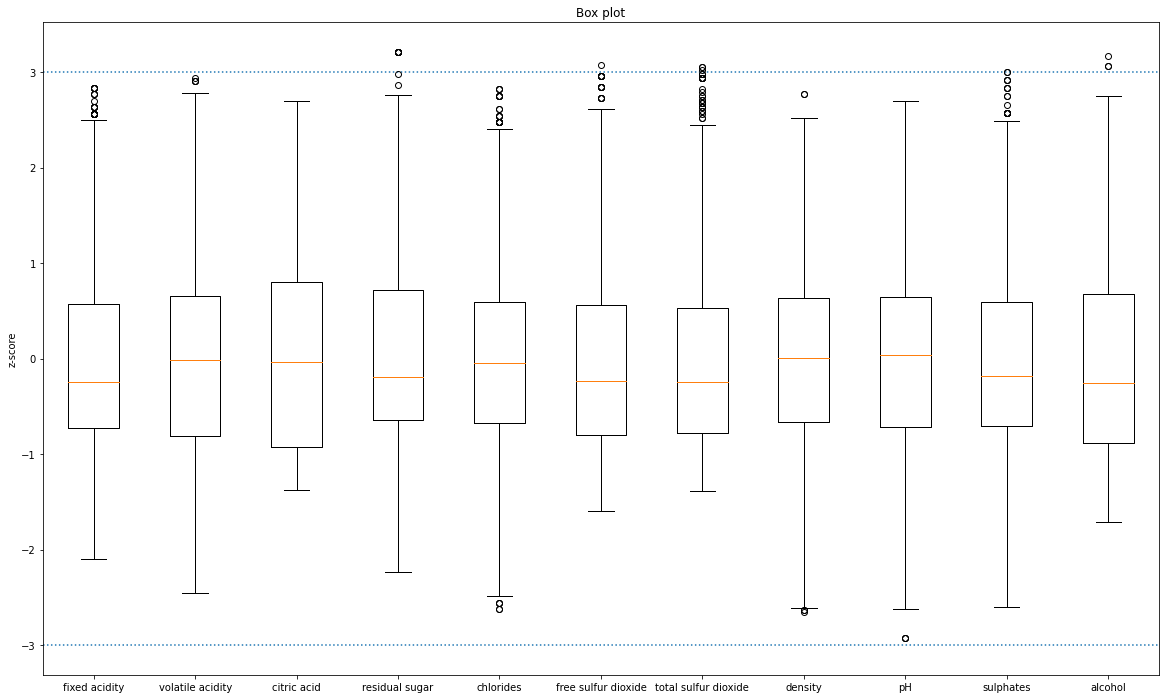

In [25]:
plt.figure(figsize=(20,12))
plt.boxplot(standardize_data(wine_data_iqr.iloc[:,:-1]))
plt.ylabel('z-score')
plt.title('Box plot')
plt.hlines(y=-3,xmin=0.5,xmax=11.5,linestyles='dotted')
plt.hlines(y=3,xmin=0.5,xmax=11.5,linestyles='dotted')
plt.xticks(ticks=np.arange(1,12),labels=wine_data_iqr.iloc[:,:-1].columns)
plt.show()

In [26]:
wine_data_iqr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### Shape after filtering

In [27]:
wine_data_iqr.shape

(1179, 12)

##### Separating the independent and dependent variable

In [28]:
X_iqr = wine_data_iqr.iloc[:,:-1]
y_iqr = wine_data_iqr['quality']

##### Splitting the data into train and test data

In [57]:
X_train_iqr, X_test_iqr, y_train_iqr, y_test_iqr = train_test_split(X_iqr,y_iqr,test_size=0.30,random_state=10)

##### Standardising the independent variables as they are on different scale,so that each variable have equal say in decision making

In [58]:
std_scaler_iqr = StandardScaler()
X_train_iqr_s = std_scaler_iqr.fit_transform(X_train_iqr)
X_test_iqr_s = std_scaler_iqr.transform(X_test_iqr)

# Trying out diffent classifiers

Starting with the most basic i.e Naive Bayes

## 1.Naive Bayes

In [59]:
nb_clf_iqr = GaussianNB()

In [60]:
nb_clf_iqr.fit(X_train_iqr_s,y_train_iqr)

GaussianNB()

##### Train score

In [61]:
nb_clf_iqr.score(X_train_iqr_s,y_train_iqr)

0.5915151515151515

##### Test score

In [62]:
nb_clf_iqr.score(X_test_iqr_s,y_test_iqr)

0.596045197740113

## 2.Logistic Regression

In [63]:
log_reg = LogisticRegression()

In [64]:
log_reg.fit(X_train_iqr_s,y_train_iqr)

LogisticRegression()

##### Train score

In [65]:
log_reg.score(X_train_iqr_s,y_train_iqr)

0.6315151515151515

##### Test score

In [66]:
log_reg.score(X_test_iqr_s,y_test_iqr)

0.6384180790960452

There is some improvement in Logistic Regression as compared to the Naive Bayes model

#### 3.Decision Tree

In [67]:
dt_clf = DecisionTreeClassifier(random_state=35)

##### Training the tree with no constraints...letting it grow to its fullest...then we'll post-prune it

In [68]:
dt_clf.fit(X_train_iqr,y_train_iqr)

DecisionTreeClassifier(random_state=35)

##### Train score...as expected it came as 1...as no contraints were provided

In [69]:
dt_clf.score(X_train_iqr,y_train_iqr)

1.0

##### Test score

In [70]:
dt_clf.score(X_test_iqr,y_test_iqr)

0.6129943502824858

#### Pruning the tree

In [71]:
path = dt_clf.cost_complexity_pruning_path(X_train_iqr,y_train_iqr)

1. total cost = residual error + alpha * no of leaf nodes</br>
2. as the leaf node grows, the tree will have more cost...as alpha increases the tree will be pruned more</br>
3. Calculating the alpha value</br>


In [72]:
alphas, impurities = path.ccp_alphas, path.impurities

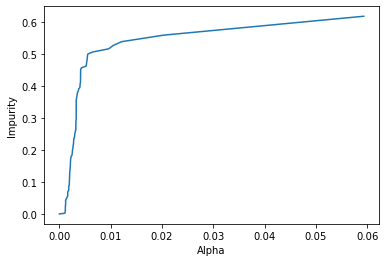

In [73]:
plt.plot(alphas,impurities)
plt.xlabel('Alpha')
plt.ylabel('Impurity')
plt.show()

In [74]:
train_scores = []
test_scores = []
for i in alphas:
    dt_clf = DecisionTreeClassifier(ccp_alpha=i,random_state=35)
    dt_clf.fit(X_train_iqr,y_train_iqr)
    train_scores.append(dt_clf.score(X_train_iqr,y_train_iqr))
    test_scores.append(dt_clf.score(X_test_iqr,y_test_iqr))

##### Searching for alpha value that maximises the test score

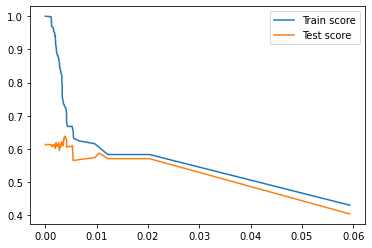

In [75]:
plt.plot(alphas,train_scores,label='Train score')
plt.plot(alphas,test_scores,label='Test score')
plt.legend()
plt.show()

In [79]:
optimum_alpha = alphas[np.argmax(test_scores)]
optimum_alpha

0.0037056964882188313

In [80]:
dt_clf = DecisionTreeClassifier(ccp_alpha=optimum_alpha)
dt_clf.fit(X_train_iqr,y_train_iqr)
print(dt_clf.score(X_train_iqr,y_train_iqr))
print(dt_clf.score(X_test_iqr,y_test_iqr))

0.7296969696969697
0.6384180790960452


#### Random Forest

In [95]:
rf_clf = RandomForestClassifier(random_state=10)

In [96]:
params = {'n_estimators':[60,70,100,120,140],
         'max_depth':[10,11,12,14,16,20],
         'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

In [97]:
grid_tree_clf = GridSearchCV(rf_clf,param_grid=params,cv=10)

In [98]:
grid_tree_clf.fit(X_train_iqr,y_train_iqr)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 12, 14, 16, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [60, 70, 100, 120, 140]})

In [99]:
grid_tree_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'auto',
 'n_estimators': 100}

In [100]:
RF_clf = RandomForestClassifier(n_estimators=100,max_depth=14,criterion='entropy',max_features='auto')

In [107]:
RF_clf.fit(X_train_iqr,y_train_iqr)

RandomForestClassifier(criterion='entropy', max_depth=14)

In [108]:
RF_clf.score(X_train_iqr,y_train_iqr)

1.0

In [109]:
RF_clf.score(X_test_iqr,y_test_iqr)

0.7203389830508474

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test_iqr, RF_clf.predict(X_test_iqr)))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.74      0.84      0.79       161
           6       0.68      0.71      0.70       143
           7       0.89      0.40      0.55        43

    accuracy                           0.72       354
   macro avg       0.58      0.49      0.51       354
weighted avg       0.72      0.72      0.71       354



In [135]:
zipped = zip(wine_data.iloc[:,:-1].columns,RF_clf.feature_importances_)
for column,importance in sorted(zipped, key=lambda x: x[1],reverse=True):
    print(f'{column}\n{importance}')
    print()

alcohol
0.16916910217387454

sulphates
0.12232820465081545

volatile acidity
0.09771243750987678

total sulfur dioxide
0.09261946746740048

density
0.0896278747624863

chlorides
0.08462212006040733

citric acid
0.08247429878149797

pH
0.07166025136162785

fixed acidity
0.07010196352572018

free sulfur dioxide
0.06228322679793928

residual sugar
0.057401052908353956

